In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')



In [ ]:
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

Join Transactions and Products on Product ID. Then join this dataframe with Customers on Customer ID.

In [ ]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [ ]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
merged_data = merged_data.drop(['Price_y'], axis=1)


In [ ]:
merged_data = merged_data.rename(columns={'Price_x': 'Price'})


In [ ]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


First, we will print the statistics of each column and check for missing values or abnormal values (like having negative values for amount spent etc).

In [ ]:
print("\nMerged Data Info:")
print(merged_data.info())
print("\nSummary Statistics:")
print(merged_data.describe())


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB
None

Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       

In [ ]:
print("\nMissing Values:")
print(merged_data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
dtype: int64


# 1. Date and Time of Order Trend


In [ ]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
date_range = (merged_data['TransactionDate'].min(), merged_data['TransactionDate'].max())
print("\nTransaction Date Range:", date_range)



Transaction Date Range: (Timestamp('2023-12-30 15:29:12'), Timestamp('2024-12-28 11:00:00'))


Finding transaction frequency in hourly sets to identify at which time customers are most active

In [ ]:
# Transactions per hour
merged_data['Hour'] = merged_data['TransactionDate'].dt.hour
hourly_transactions = merged_data.groupby('Hour').size()

print("\nNumber of Transactions per Hour:")
hourly_transactions_formatted = pd.DataFrame({
    'Hour': [f"{i}-{(i+1)%24}" for i in range(24)],
    'Number of Transactions': hourly_transactions.values
})
print(hourly_transactions_formatted[['Hour', 'Number of Transactions']].to_string(index=False))



Number of Transactions per Hour:
 Hour  Number of Transactions
  0-1                      42
  1-2                      34
  2-3                      37
  3-4                      51
  4-5                      44
  5-6                      33
  6-7                      39
  7-8                      45
  8-9                      35
 9-10                      48
10-11                      42
11-12                      39
12-13                      37
13-14                      30
14-15                      60
15-16                      36
16-17                      51
17-18                      47
18-19                      42
19-20                      45
20-21                      39
21-22                      41
22-23                      46
 23-0                      37


Finding transaction frequency in day wise sets to identify in which days customers are most active

In [ ]:
merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()
daily_transactions = merged_data['DayOfWeek'].value_counts()

daily_transactions = daily_transactions.reindex(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

print("\nNumber of Transactions by Day of the Week:")
daily_transactions_formatted = pd.DataFrame({
    'Day': daily_transactions.index,
    'Number of Transactions': daily_transactions.values
})
print(daily_transactions_formatted.to_string(index=False))



Number of Transactions by Day of the Week:
      Day  Number of Transactions
   Sunday                     139
   Monday                     139
  Tuesday                     163
Wednesday                     158
 Thursday                     150
   Friday                     125
 Saturday                     126


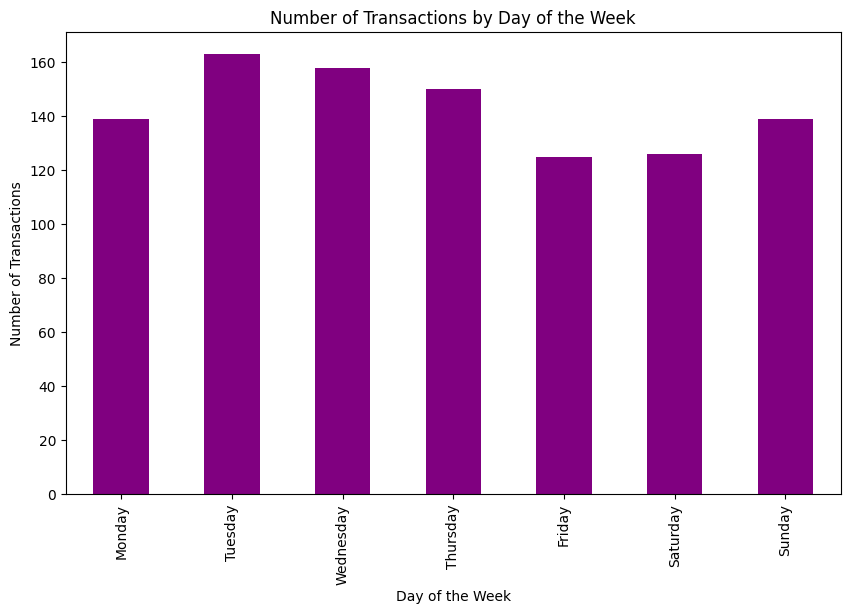

In [ ]:
plt.figure(figsize=(10, 6))
daily_transactions.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color='purple')
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

Finding transaction frequency monthly to identify in which months customers are most active

In [ ]:
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_transactions = merged_data.groupby('YearMonth')['TransactionID'].nunique()

monthly_transactions_table = monthly_transactions.reset_index()
monthly_transactions_table.columns = ['Year/Month', 'Number of Transactions']

print("Monthly Transactions Table:")
print(monthly_transactions_table)

Monthly Transactions Table:
   Year/Month  Number of Transactions
0     2023-12                       4
1     2024-01                     107
2     2024-02                      77
3     2024-03                      80
4     2024-04                      86
5     2024-05                      86
6     2024-06                      69
7     2024-07                      96
8     2024-08                      94
9     2024-09                      96
10    2024-10                      70
11    2024-11                      57
12    2024-12                      78


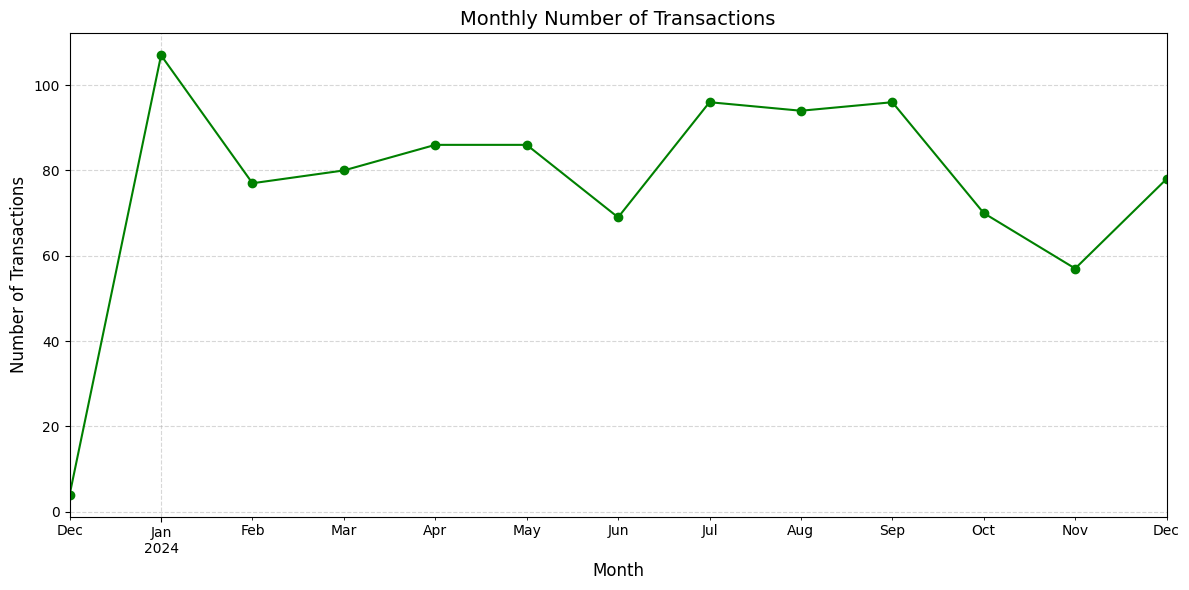

In [ ]:
# Group by year and month to count transactions
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_transactions = merged_data.groupby('YearMonth')['TransactionID'].nunique()  # Count unique transactions

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', color='green', marker='o')
plt.title('Monthly Number of Transactions', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Best-Selling Product for Each Category in Each Region

In [ ]:
unique_categories = products['Category'].nunique()
unique_product_names = products['ProductName'].nunique()
unique_product_ids = products['ProductID'].nunique()

print("Number of Unique Categories:", unique_categories)
print("Number of Unique Product Names:", unique_product_names)
print("Number of Unique Product IDs:", unique_product_ids)


Number of Unique Categories: 4
Number of Unique Product Names: 66
Number of Unique Product IDs: 100


In [ ]:
# Group by Region, Category, and ProductID, summing up the Quantity
category_region_sales = merged_data.groupby(['Region', 'Category', 'ProductID', 'ProductName'])['Quantity'].sum().reset_index()

# Find the best-selling product for each Category in each Region
best_selling_products = category_region_sales.loc[category_region_sales.groupby(['Region', 'Category'])['Quantity'].idxmax()]

best_selling_products = best_selling_products.sort_values(by=['Region', 'Category']).reset_index(drop=True)

print("Best Selling Products for Each Category in Each Region:")
print(best_selling_products.to_string(index=False))




Best Selling Products for Each Category in Each Region:
       Region    Category ProductID                ProductName  Quantity
         Asia       Books      P040     SoundWave Mystery Book        12
         Asia    Clothing      P076           ActiveWear Jeans        14
         Asia Electronics      P057      ActiveWear Smartphone        12
         Asia  Home Decor      P047 ComfortLiving Cookware Set        16
       Europe       Books      P049           TechPro Textbook        19
       Europe    Clothing      P092    BookWorld Running Shoes        13
       Europe Electronics      P083      ActiveWear Smartwatch        13
       Europe  Home Decor      P006             ActiveWear Rug        17
North America       Books      P055        BookWorld Biography        12
North America    Clothing      P019      ComfortLiving Sweater        17
North America Electronics      P027       SoundWave Headphones        18
North America  Home Decor      P022         HomeSense Wall Art      

In [ ]:
pivot_data = category_region_sales.pivot_table(index='Category', columns='Region', values='Quantity', aggfunc='sum', fill_value=0)

print("Best Selling Products for Each Category in Each Region:")
print(pivot_data)

Best Selling Products for Each Category in Each Region:
Region       Asia  Europe  North America  South America
Category                                               
Books         120     165            155            241
Clothing      166     119            147            158
Electronics   132     144            153            198
Home Decor    142     167            138            192


<Figure size 1200x800 with 0 Axes>

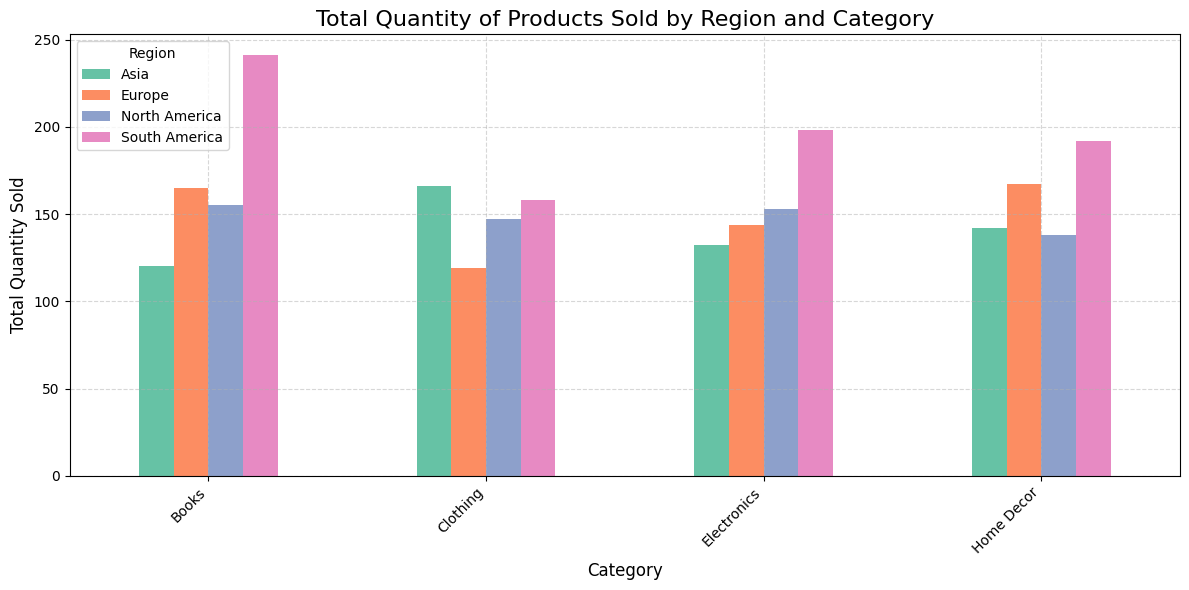

In [ ]:

plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', figsize=(12, 6), color=sns.color_palette("Set2", len(pivot_data.columns)))

plt.title('Total Quantity of Products Sold by Region and Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Region', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Average Amount Spent Per Category and Total Transactions

In [ ]:
# Calculate total amount spent per category
category_spending = merged_data.groupby('Category')['TotalValue'].sum().reset_index()

# Calculate the number of transactions per category
category_transactions = merged_data.groupby('Category')['TransactionID'].nunique().reset_index()

# Calculate average amount spent per category
category_spending['AverageSpent'] = category_spending['TotalValue'] / category_transactions['TransactionID']

category_stats = pd.merge(category_spending, category_transactions[['Category', 'TransactionID']], on='Category')

category_stats = category_stats.rename(columns={'TransactionID': 'Number of Transactions'})

print("Category Statistics (Average Amount Spent and Total Transactions):")
print(category_stats[['Category', 'AverageSpent', 'Number of Transactions']])






Category Statistics (Average Amount Spent and Total Transactions):
      Category  AverageSpent  Number of Transactions
0        Books    711.657296                     270
1     Clothing    728.818684                     228
2  Electronics    711.746063                     254
3   Home Decor    608.443266                     248


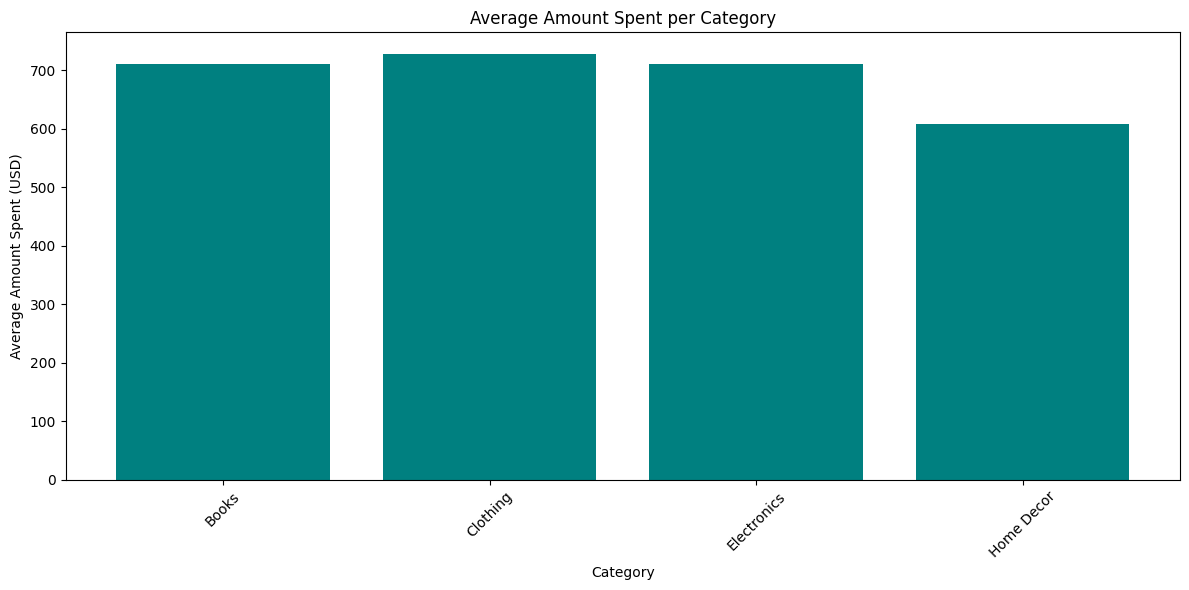

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(category_stats['Category'], category_stats['AverageSpent'], color='teal')
plt.title('Average Amount Spent per Category')
plt.xlabel('Category')
plt.ylabel('Average Amount Spent (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


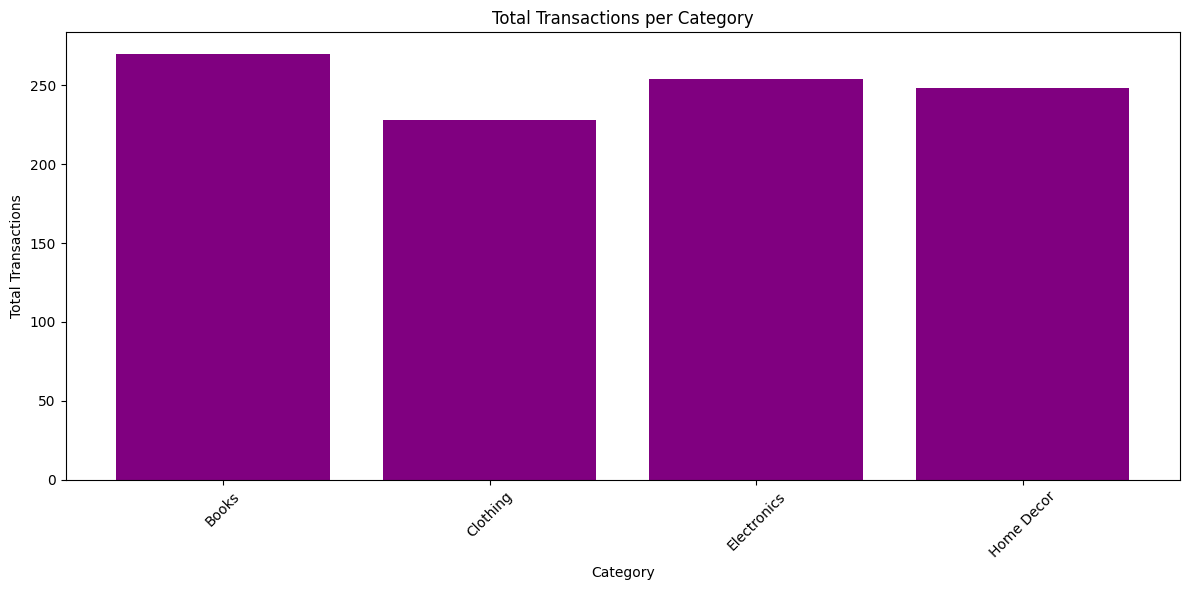

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(category_stats['Category'], category_stats['Number of Transactions'], color='purple')
plt.title('Total Transactions per Category')
plt.xlabel('Category')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Top Customers Based on Amount Spent (Top 10%)


In [ ]:
# Calculate total amount spent by each customer
customer_spending = merged_data.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()

# Calculate the 90th percentile for each region
percentile_90 = customer_spending.groupby('Region')['TotalValue'].quantile(0.9).reset_index()
percentile_90 = percentile_90.rename(columns={'TotalValue': '90thPercentile'})

customer_spending = pd.merge(customer_spending, percentile_90, on='Region')

# Filter customers whose total amount spent is above the 80th percentile for their region
top_customers = customer_spending[customer_spending['TotalValue'] >= customer_spending['90thPercentile']]

top_customers_sorted = top_customers.sort_values(by=['Region', 'TotalValue'], ascending=[True, False])

top_customers_grouped = top_customers_sorted.groupby('Region')

print("Region\tCustomerID\tTotalValue")
for region, group in top_customers_grouped:
    print(f"\n{region}")
    for _, row in group.iterrows():
        print(f"\t{row['CustomerID']}\t{row['TotalValue']:.2f}")


Region	CustomerID	TotalValue

Asia
	C0054	8040.39
	C0028	6819.57
	C0175	6210.53
	C0143	6044.63
	C0045	6021.80

Europe
	C0141	10673.87
	C0041	6149.78
	C0075	5848.97
	C0114	5780.43
	C0051	5699.57

North America
	C0065	7663.70
	C0156	7634.45
	C0059	7073.28
	C0068	5950.42
	C0046	5627.83

South America
	C0082	7572.91
	C0188	7111.32
	C0099	6715.72
	C0165	6708.10
	C0087	6604.23
	C0104	6579.10


# 5. Best-Selling Category Based on Quantity for each company


In [ ]:
# Extract unique company names
merged_data['Company'] = merged_data['ProductName'].str.split(' ').str[0]  # First word is the company name

unique_companies = merged_data['Company'].unique()


# Calculate total quantities sold per category for each company
company_category_sales = merged_data.groupby(['Company', 'Category'])['Quantity'].sum().reset_index()

# Identify the best-selling category for each company based on quantity
best_selling_category = company_category_sales.loc[company_category_sales.groupby('Company')['Quantity'].idxmax()]

print("Unique Companies:")
print(unique_companies)

print("\nTotal Quantities Sold per Category for Each Company:")
print(company_category_sales)

print("\nBest Selling Category for Each Company:")
print(best_selling_category)


Unique Companies:
['ComfortLiving' 'HomeSense' 'ActiveWear' 'TechPro' 'BookWorld'
 'SoundWave']

Total Quantities Sold per Category for Each Company:
          Company     Category  Quantity
0      ActiveWear        Books        98
1      ActiveWear     Clothing       163
2      ActiveWear  Electronics       179
3      ActiveWear   Home Decor       164
4       BookWorld        Books       119
5       BookWorld     Clothing        97
6       BookWorld  Electronics        46
7       BookWorld   Home Decor        52
8   ComfortLiving        Books        65
9   ComfortLiving     Clothing        35
10  ComfortLiving  Electronics       116
11  ComfortLiving   Home Decor        72
12      HomeSense        Books        39
13      HomeSense     Clothing       121
14      HomeSense  Electronics        41
15      HomeSense   Home Decor       192
16      SoundWave        Books       207
17      SoundWave     Clothing        80
18      SoundWave  Electronics       168
19      SoundWave   Home Decor

In [ ]:
company_category_sales = merged_data.groupby(['Company', 'Category'])['Quantity'].sum().reset_index()

Identify the best-selling category for each company based on quantity
best_selling_category = company_category_sales.loc[company_category_sales.groupby('Company')['Quantity'].idxmax()]

company_grouped = company_category_sales.groupby('Company')
print("\nTotal Quantities Sold per Category for Each Company:")

for company, group in company_grouped:
    print(f"\n{company}")
    for _, row in group.iterrows():
        print(f"\t{row['Category']}\t{row['Quantity']}")


Total Quantities Sold per Category for Each Company:

ActiveWear
	Books	98
	Clothing	163
	Electronics	179
	Home Decor	164

BookWorld
	Books	119
	Clothing	97
	Electronics	46
	Home Decor	52

ComfortLiving
	Books	65
	Clothing	35
	Electronics	116
	Home Decor	72

HomeSense
	Books	39
	Clothing	121
	Electronics	41
	Home Decor	192

SoundWave
	Books	207
	Clothing	80
	Electronics	168
	Home Decor	89

TechPro
	Books	153
	Clothing	94
	Electronics	77
	Home Decor	70


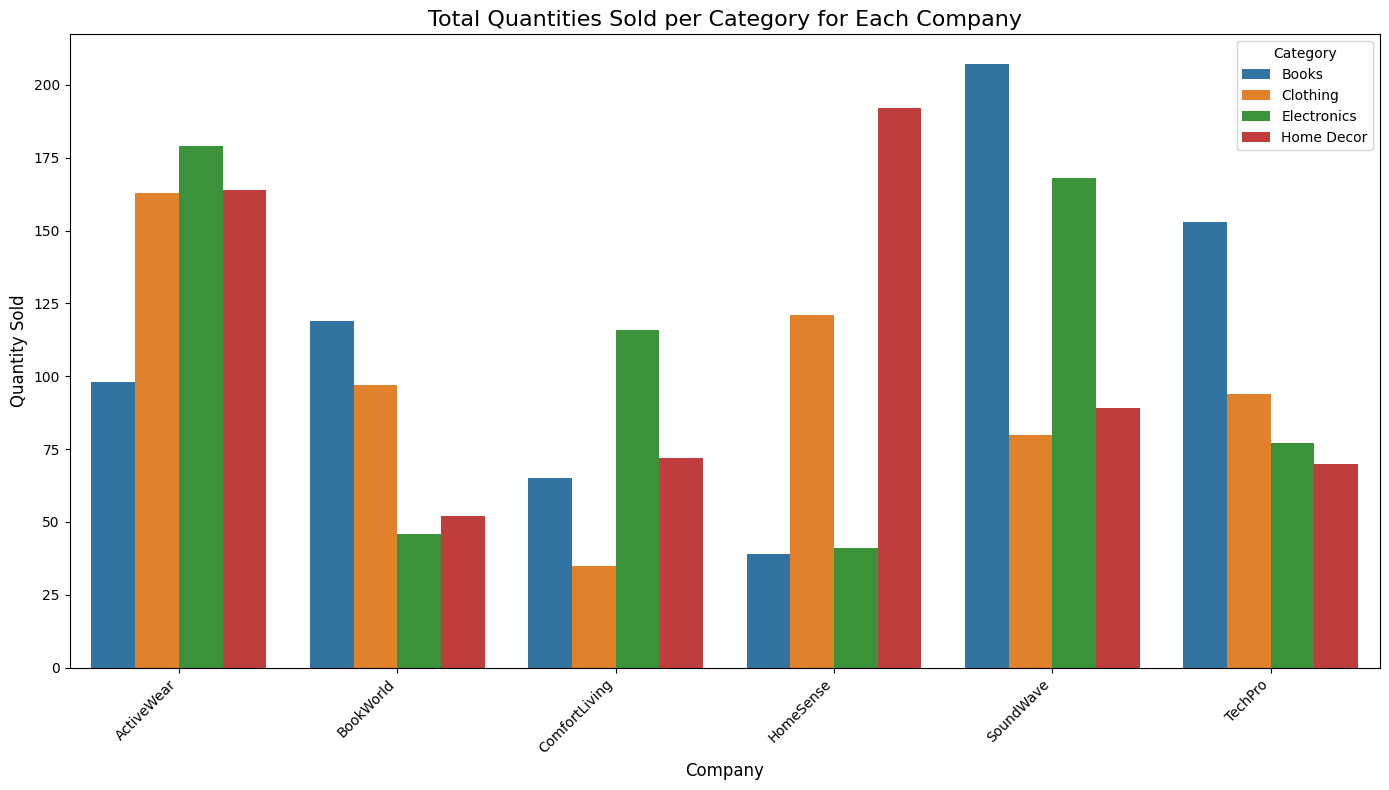

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(data=company_category_sales, x='Company', y='Quantity', hue='Category')

plt.title('Total Quantities Sold per Category for Each Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Find the best-selling category for each company based on quantity
best_selling_category = company_category_sales.loc[company_category_sales.groupby('Company')['Quantity'].idxmax()]

print("\nBest Selling Category for Each Company:")
for company, group in best_selling_category.iterrows():
    print(f"{group['Company']}    {group['Category']}    {group['Quantity']}")



Best Selling Category for Each Company:
ActiveWear    Electronics    179
BookWorld    Books    119
ComfortLiving    Electronics    116
HomeSense    Home Decor    192
SoundWave    Books    207
TechPro    Books    153
